Initial True Probabilities: [0.55739978 0.03580508 0.2920732  0.82637621 0.83843029 0.0343852
 0.51168373 0.3787583  0.93533702 0.93971749]
Round 100: Updated True Probabilities: [0.53021519 0.         0.25284843 0.85460963 0.86780873 0.
 0.54464207 0.4006182  0.97998206 1.        ]
Round 200: Updated True Probabilities: [0.54642548 0.         0.23305536 0.88894828 0.86531135 0.
 0.59514444 0.31033098 0.99923151 0.97623666]
Round 300: Updated True Probabilities: [0.57365424 0.         0.31688439 0.88600908 0.90456006 0.04074195
 0.47462509 0.26378896 1.         0.9660584 ]
Round 400: Updated True Probabilities: [0.61571624 0.         0.35662664 0.84274604 0.88309882 0.02735646
 0.40628383 0.3095032  1.         0.95947336]
Round 500: Updated True Probabilities: [0.5933607  0.01019105 0.38552944 0.87624244 0.87990419 0.11079692
 0.44489062 0.30857105 0.94731026 0.96830262]
Round 600: Updated True Probabilities: [0.57769473 0.         0.39934121 0.85784157 0.80510818 0.17186014
 0.4636682

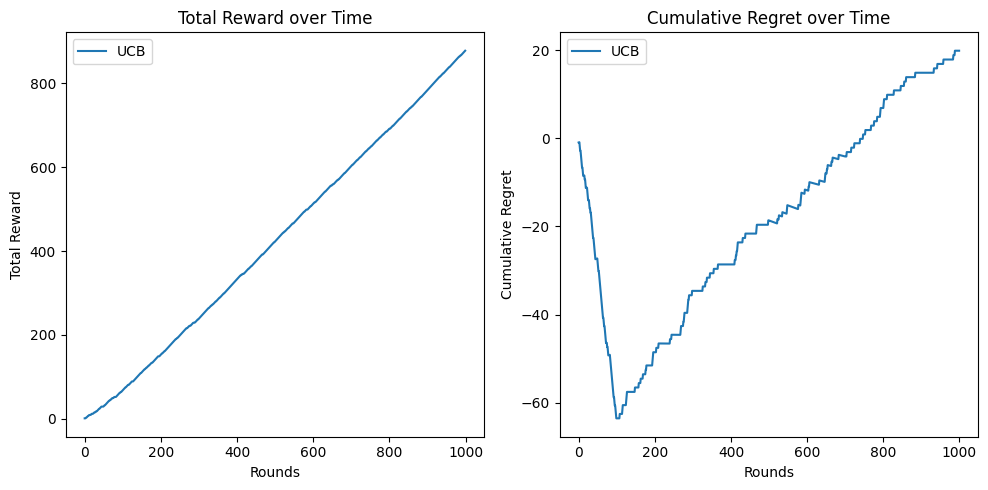

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
number_of_arms = 10
number_of_rounds = 1000
prob_change_interval = 100

# Initialize UCB variables
estimated_ucb_rewards = np.zeros(number_of_arms)
ucb_counts = np.zeros(number_of_arms)
total_ucb_reward = 0
ucb_rewards = np.zeros(number_of_rounds)
cumulative_ucb_regret = np.zeros(number_of_rounds)

# Optimal strategy variables
optimal_reward = 0
optimal_rewards = np.zeros(number_of_rounds)
best_arm = np.argmax(true_probabilities)

# Initialize true probabilities
true_probabilities = np.random.rand(number_of_arms)
print(f"Initial True Probabilities: {true_probabilities}")

# Function to update probabilities
def update_probabilities(probs, step_size=0.05):
    new_probs = probs + step_size * np.random.randn(number_of_arms)
    new_probs = np.clip(new_probs, 0, 1)
    return new_probs

# UCB Algorithm
for round in range(number_of_rounds):
    if round % prob_change_interval == 0 and round != 0:
        true_probabilities = update_probabilities(true_probabilities)
        best_arm = np.argmax(true_probabilities)
        print(f"Round {round}: Updated True Probabilities: {true_probabilities}")

    if round < number_of_arms:
        arm_ucb = round
    else:
        ucb_values = estimated_ucb_rewards + np.sqrt((2 * np.log(round + 1)) / ucb_counts)
        arm_ucb = np.argmax(ucb_values)

    reward_ucb = np.random.rand() < true_probabilities[arm_ucb]

    ucb_counts[arm_ucb] += 1
    estimated_ucb_rewards[arm_ucb] += (reward_ucb - estimated_ucb_rewards[arm_ucb]) / ucb_counts[arm_ucb]

    total_ucb_reward += reward_ucb
    ucb_rewards[round] = total_ucb_reward

    optimal_rewards[round] = true_probabilities[best_arm]
    optimal_reward += optimal_rewards[round]
    cumulative_ucb_regret[round] = optimal_reward - total_ucb_reward

# Debugging Prints
print("Estimated UCB Rewards: ", estimated_ucb_rewards)
print("UCB Counts: ", ucb_counts)
print("Cumulative UCB Regret: ", cumulative_ucb_regret)

# Plotting
plt.figure(figsize=(10, 5))

# Total Rewards
plt.subplot(1, 2, 1)
plt.plot(ucb_rewards, label='UCB')
plt.xlabel('Rounds')
plt.ylabel('Total Reward')
plt.title('Total Reward over Time')
plt.legend()

# Cumulative Regret
plt.subplot(1, 2, 2)
plt.plot(cumulative_ucb_regret, label='UCB')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret over Time')
plt.legend()

plt.tight_layout()
plt.show()
